In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

url = "https://vincentarelbundock.github.io/Rdatasets/csv/MASS/crabs.csv"
df = pd.read_csv(url)
df.head()

,rownames,sp,sex,index,FL,RW,CL,CW,BD
0,1,B,M,1,8.1,6.7,16.1,19.0,7.0
1,2,B,M,2,8.8,7.7,18.1,20.8,7.4
2,3,B,M,3,9.2,7.8,19.0,22.4,7.7
3,4,B,M,4,9.6,7.9,20.1,23.1,8.2
4,5,B,M,5,9.8,8.0,20.3,23.0,8.2


In [20]:
%matplotlib inline

mpl.rcParams.update({
    "figure.dpi": 200,
    "font.size": 8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.5,
    "xtick.major.size": 2,
    "ytick.major.size": 2,
})

In [21]:
def fix_axes(axis):
    axis.xaxis.set_ticks_position('bottom')
    axis.yaxis.set_ticks_position('left')
    axis.tick_params(axis='both', which='major', length=2, labelsize=7)
    return axis


In [101]:
print("Original uncleaned columns:", df.columns.tolist())

removing_columns = [col for col in df.columns if col.lower().startswith("unnamed") or col in ("X", "Row")] #removing any unneeded columns like the unnamed one
if removing_columns: #only remove the column is something is there to remove
    df = df.drop(columns=removing_columns)
    print("Dropped columns:", removing_columns) #checking my columns were removed

expected_columns = ['sp','sex','index','FL','RW','CL','CW','BD']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing_columns}. Got {df.columns.tolist()}")
df = df[expected_columns]

print("Final columns List:", df.columns.tolist())
print("Shape:", df.shape)
print(df.head())
data = df.to_records(index=False)
print("Record array fields:", data.dtype.names)
print("First row:", data[0])

Original uncleaned columns: ['sp', 'sex', 'index', 'FL', 'RW', 'CL', 'CW', 'BD']
Final columns List: ['sp', 'sex', 'index', 'FL', 'RW', 'CL', 'CW', 'BD']
Shape: (200, 8)
  sp sex  index   FL   RW    CL    CW   BD
0  B   M      1  8.1  6.7  16.1  19.0  7.0
1  B   M      2  8.8  7.7  18.1  20.8  7.4
2  B   M      3  9.2  7.8  19.0  22.4  7.7
3  B   M      4  9.6  7.9  20.1  23.1  8.2
4  B   M      5  9.8  8.0  20.3  23.0  8.2
Record array fields: ('sp', 'sex', 'index', 'FL', 'RW', 'CL', 'CW', 'BD')
First row: ('B', 'M', 1, 8.1, 6.7, 16.1, 19.0, 7.0)


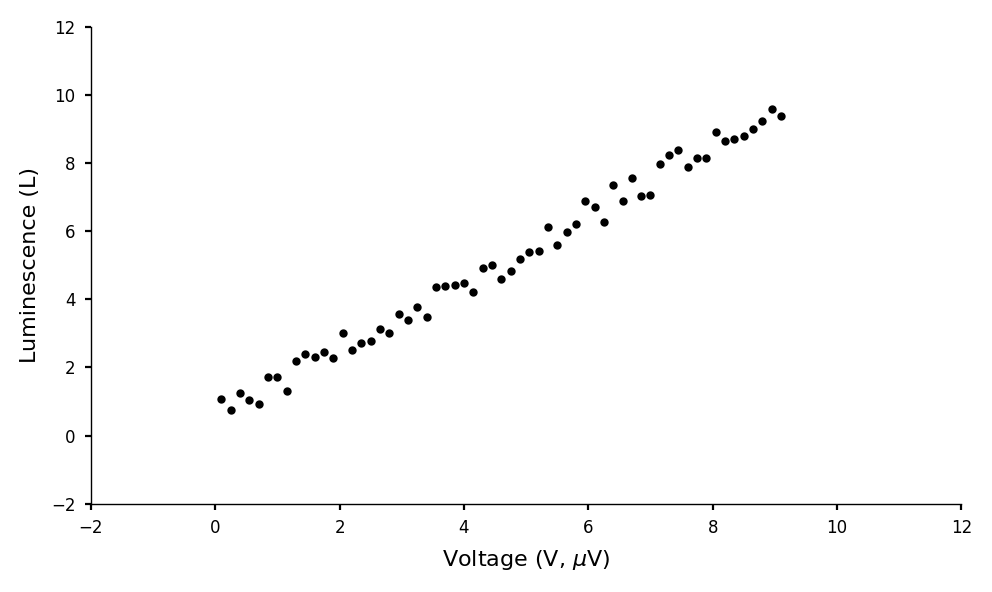

In [103]:
t= np.arange(0.1, 9.2, 0.15)
y = t + np.random.rand(len(t))

fig = plt.figure(figsize=(5,3))
axis = fig.add_subplot(111)
clean_axes(axis)
axis.plot(time_values, noise_values, marker='.', linestyle='', markersize=4, color='k', clip_on=False)
axis.set_xlim(-2, 12); axis.set_ylim(-2, 12)
axis.set_xlabel(r'Voltage (V, $\mu$V)')
axis.set_ylabel('Luminescence (L)')
fig.tight_layout()
plt.show()
fig.savefig('mpl_template.svg')

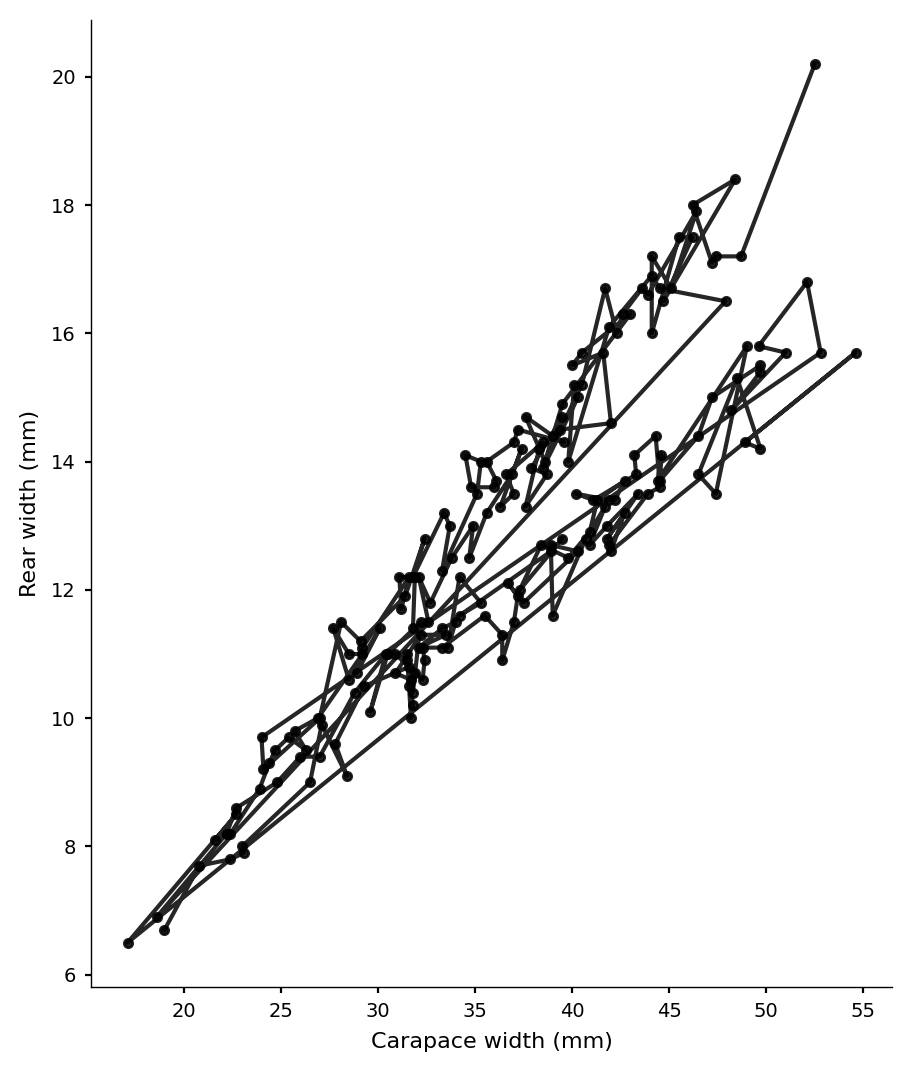

In [104]:
CW = data['CW']  
RW = data['RW']  

fig = plt.figure(figsize=(4.6,5.4))
axis = fig.add_subplot(111)
fix_axes(axis)
axis.plot(carapace_width, rear_width, '', marker='o', markersize=3, alpha=0.85, color='k')
axis.set_xlabel('Carapace width (mm)')
axis.set_ylabel('Rear width (mm)')
fig.tight_layout()
plt.show()
fig.savefig('mpl_figure_cw_rw.svg')


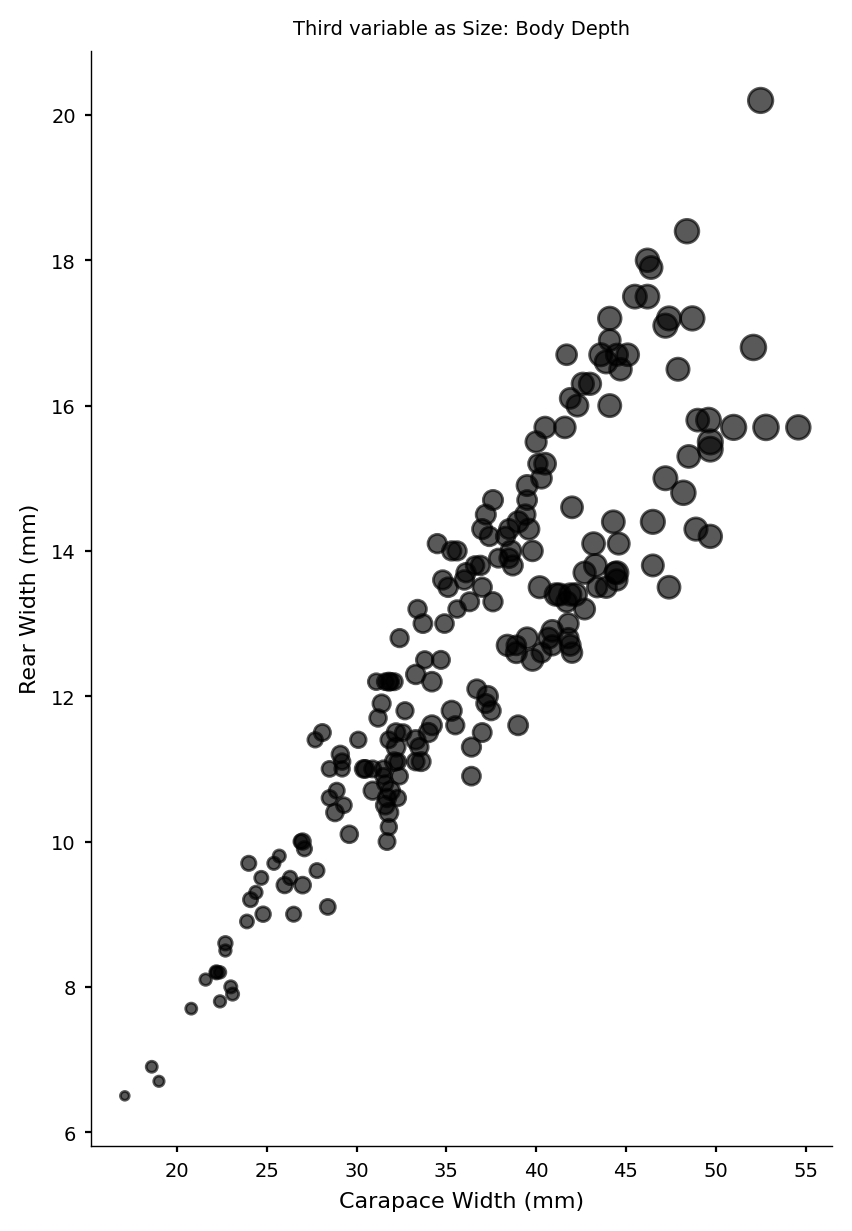

In [58]:
body_depth = data['BD']
sizes = 10 + 70 * (body_depth - body_depth.min()) / (body_depth.max() - body_depth.min())

fig = plt.figure(figsize=(4.3,6.2))
axis = fig.add_subplot(111)
fix_axes(axis)
axis.scatter(CW, RW, s=sizes, c='k', alpha=0.65)
axis.set_xlabel('Carapace Width (mm)')
axis.set_ylabel('Rear Width (mm)')
axis.set_title('Third variable as Size: Body Depth', fontsize=7)
fig.tight_layout()
plt.show()
fig.savefig('figure_size.svg')


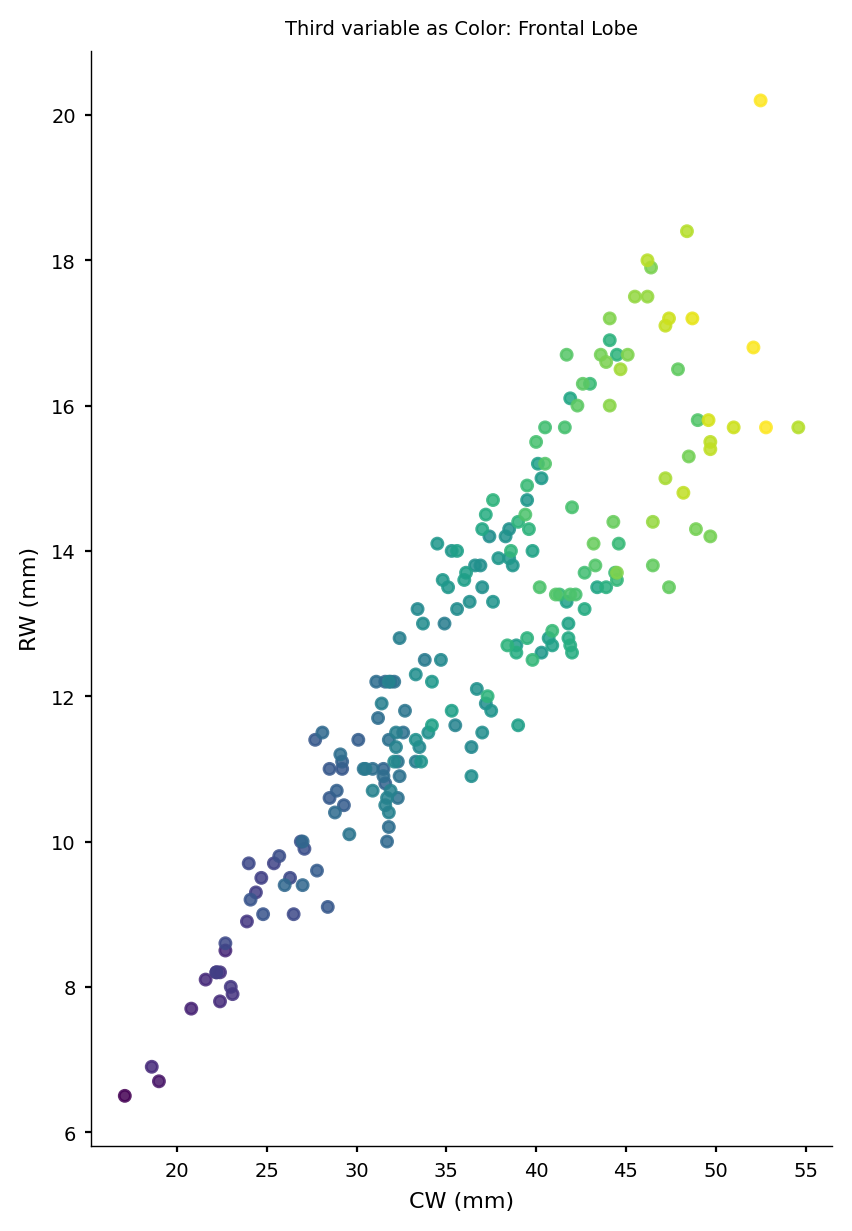

In [105]:
frontal_lobe = data['FL']

fig = plt.figure(figsize=(4.3,6.2))
axis = fig.add_subplot(111)
fix_axes(axis)
scatterplot = axis.scatter(CW, RW, c=frontal_lobe, cmap='viridis', s=16, alpha=0.85)
cbar = plt.colorbar(scatterplot, ax=ax, fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=6)
cbar.set_label('Frontal lobe size (mm)', fontsize=6)
axis.set_xlabel('CW (mm)')
axis.set_ylabel('RW (mm)')
axis.set_title('Third variable as Color: Frontal Lobe', fontsize=7)
fig.tight_layout()
plt.show()
fig.savefig('mpl_figure_color.svg')


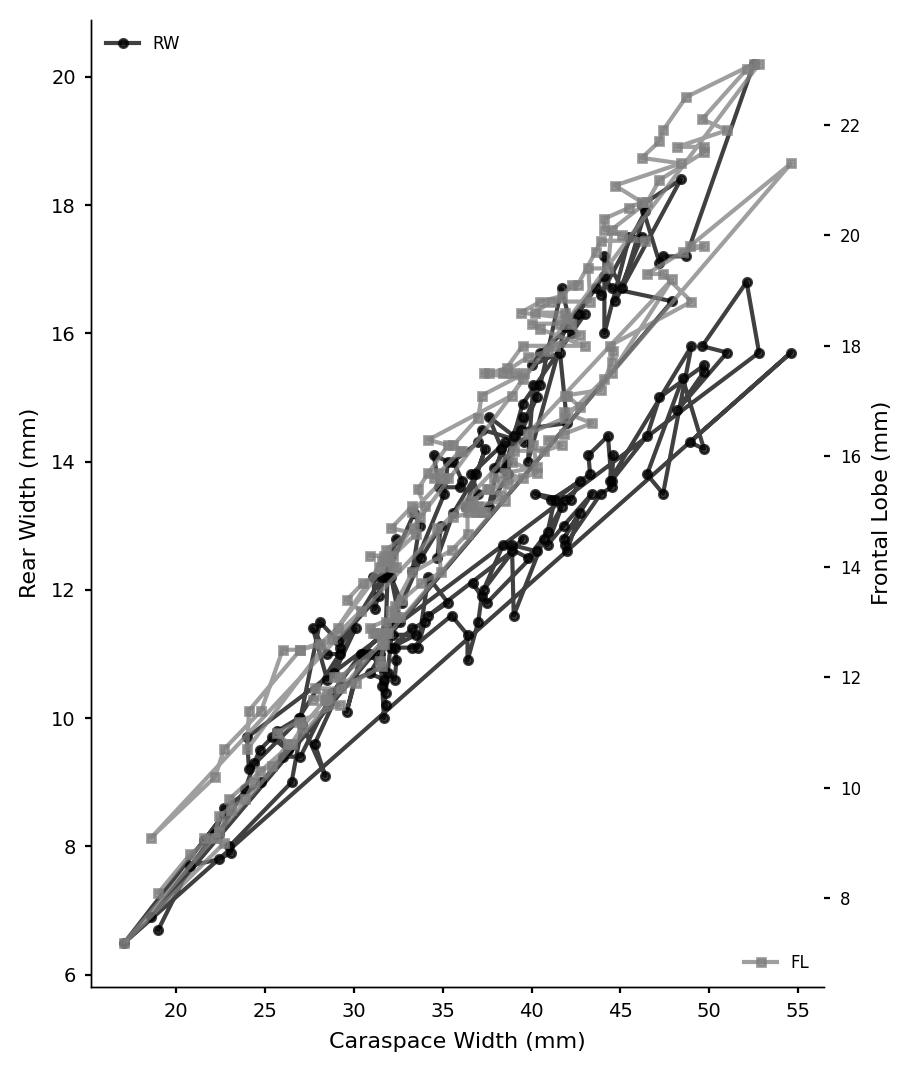

In [106]:
x  = data['CW']
y1 = data['RW']
y2 = data['FL']

fig = plt.figure(figsize=(4.6,5.4))
axis = fig.add_subplot(111)
axis2 = axis.twinx()
fix_axes(axis)
axis2.tick_params(axis='both', which='major', length=2, labelsize=6)
axis.plot(x, y1, '', marker='o', markersize=3, alpha=0.75, color='k', label='RW')
axis2.plot(x, y2, '', marker='s', markersize=3, alpha=0.75, color='tab:gray', label='FL')
axis.set_xlabel('Caraspace Width (mm)')
axis.set_ylabel('Rear Width (mm)')
axis2.set_ylabel('Frontal Lobe (mm)')
axis.legend(loc='upper left', fontsize=6, frameon=False)
axis2.legend(loc='lower right', fontsize=6, frameon=False)
fig.tight_layout()
plt.show()
fig.savefig('mpl_figure_twinx.svg')


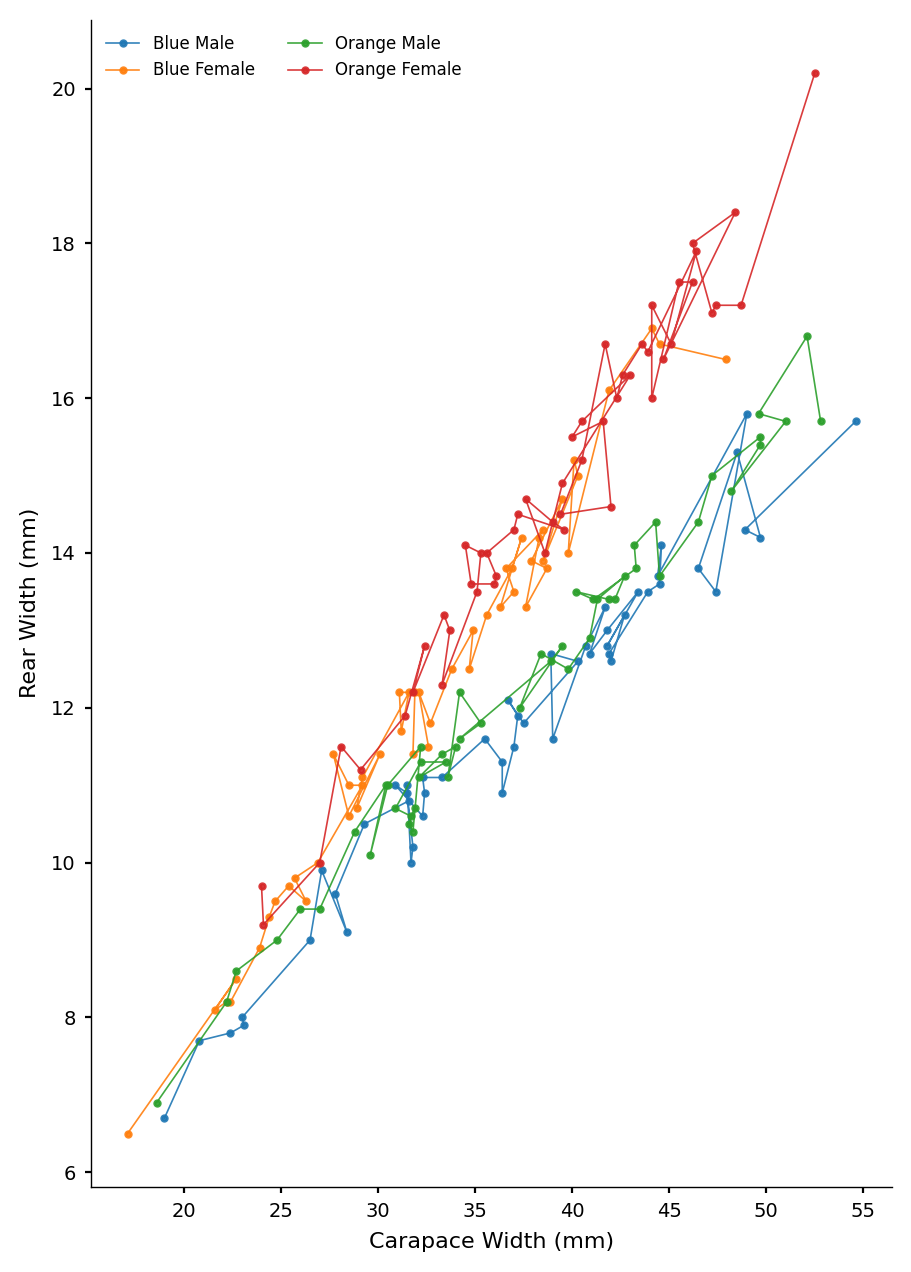

In [107]:
sp  = data['sp'] 
sex = data['sex']    
idx = data['index']  

def select_group(spc, sx):
    return (sp == spc) & (sex == sx)
groups = [('B','M'), ('B','F'), ('O','M'), ('O','F')]
labels = {'B':'Blue', 'O':'Orange', 'M':'Male', 'F':'Female'}
fig = plt.figure(figsize=(4.6,6.4))
axis = fig.add_subplot(111)
fix_axes(axis)

for spc, sx in groups:
    selected_rows = select_group(spc, sx)
    order = np.argsort(idx[selected_rows])  
    axis.plot(CW[selected_rows][order], RW[selected_rows][order],
              '-', linewidth=0.6, marker='o', markersize=2, alpha=0.9,
              label=f"{labels[spc]} {labels[sx]}")
axis.set_xlabel('Carapace Width (mm)')
axis.set_ylabel('Rear Width (mm)')
axis.legend(fontsize=6, ncol=2, frameon=False)
fig.tight_layout()
plt.show()
fig.savefig('mpl_figure_groups_lines.svg')



C:\Users\Jezle\AppData\Local\Temp\ipykernel_15820\2018004699.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


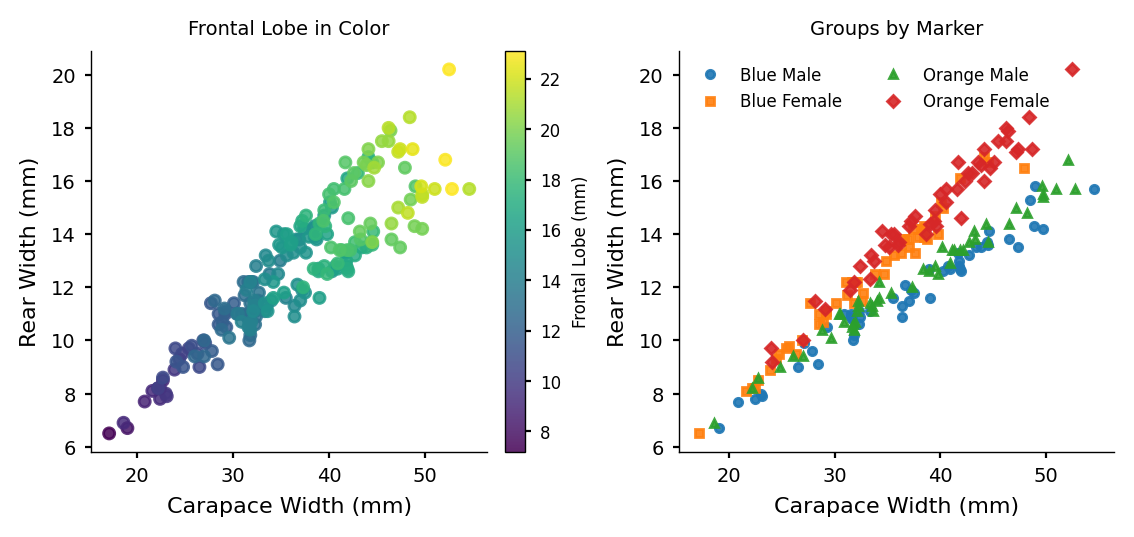

In [113]:
fig = plt.figure(figsize=(6.6,2.6))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.35)

axis1 = fig.add_subplot(gs[0]); fix_axes(axis1)  
sc = axis1.scatter(CW, RW, c=FL, cmap='viridis', s=16, alpha=0.85)
cbar = plt.colorbar(sc, ax=axis1, fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=6)
cbar.set_label('Frontal Lobe (mm)', fontsize=6)
axis1.set_xlabel('Carapace Width (mm)')
axis1.set_ylabel('Rear Width (mm)')
axis1.set_title('Frontal Lobe in Color', fontsize=7)

axis2 = fig.add_subplot(gs[1]); fix_axes(axis2)   
for s, x, mk in [('B','M','o'), ('B','F','s'), ('O','M','^'), ('O','F','D')]:
    selected_rows = select_group(s, x)
    axis2.plot(CW[selected_rows], RW[selected_rows],
               linestyle='', marker=mk, markersize=3, alpha=0.9,
               label=f"{labels[s]} {labels[x]}")
axis2.set_xlabel('Carapace Width (mm)')
axis2.set_ylabel('Rear Width (mm)')
axis2.set_title('Groups by Marker', fontsize=7)
axis2.legend(fontsize=6, ncol=2, frameon=False)
fig.tight_layout()
plt.show()
fig.savefig('mpl_multipanel.svg')


In [6]:
from svgutils.compose import Figure, SVG, Text

width = "600px"     
height = "250px"  
left_panel = "mpl_figure_color.svg"   
right_panel = "mpl_figure_twinx.svg"  
output_file = "final_figure.svg"     

Figure(
    width, height,
    SVG(left_panel).move(0, 0).scale(1.0),
    SVG(right_panel).move(350, 0).scale(1.0),
    Text("A", 10, 15, size=10, weight='bold'),
    Text("B", 360, 15, size=10, weight='bold')
).save(output_file)